In [ ]:
# Don B.
# Dr. Ofori
# Topic 6 - Hypothesis Testing
# 25 October 2023

In [ ]:
# Video Links:
# Paired t - test: https://youtu.be/SyYyu51d4ws
# ANOVA Test: https://youtu.be/SyYyu51d4ws
# Levene's Test for variance comparison: https://youtu.be/wnmEQOJ4z_o

In [ ]:
_='''
Task 1: Paired Data Analysis

Find a suitable dataset with paired data from a reliable source.
Write a Jupyter notebook to import the dataset and perform a hypothesis test for paired data.
Explain the problem, data, research question, and the appropriate statistical test that you would use to address the 
research question.

Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and 
possible remedies.

Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.
Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.
'''

In [ ]:
_='''
Notes:
Possible data sets: medical trials, educational interventions, environmental (pollution), 
economic (maybe unemployment or inflation), diet or exercise applications, tech tool speed before & after update
'''

In [61]:
_='''
Scenario:
You are an educational researcher analyzing the impacts of the COVID-19 pandemic on student performance in standardized tests. 
Given the abrupt transition to remote learning and potential interruptions in education, you aim to investigate if the ACT 
scores have significantly changed before and after the peak of the COVID-19 pandemic across various states.

Describing the Data:
Collected from National Center for Educational Statistics
Typically, the deadline for seniors to take the ACT is in the early months of the year. (need to check if this data includes 
juniors or sophomores). Changes or revisions to the ACT format, if any, should be taken into consideration. For the purposes 
of this study, we are focusing on scores from 2019 (pre-COVID) and 2021 (post-COVID peak).

Research Question:
Has the COVID-19 pandemic led to a significant change in the ACT scores across different states?

Null Hypothesis (H0): There is no significant difference in the ACT scores across states before and after the onset of the 
COVID-19 pandemic. Any observed variation is due to random fluctuations.
Alternative Hypothesis (H1): There is a significant difference in the ACT scores across states before and after the onset 
of the COVID-19 pandemic, suggesting that the pandemic might have negatively influenced student performance.
'''

# Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_rel
import seaborn as sns

# Might be better to leave packages in respective chunk

In [168]:
# Load in the Dataset and cleaning
data_act1 = pd.read_csv('/Users/don/Downloads/2019act.csv')
# Load in the Dataset and cleaning
data_act2 = pd.read_csv('/Users/don/Downloads/2021act.csv')

# List of columns to be dropped
cols_to_drop = ['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']

# Drop the specified columns
data_act1.drop(columns=cols_to_drop, inplace=True)
# Drop the specified columns
data_act2.drop(columns=cols_to_drop, inplace=True)

print(data_act1.iloc[0]) # Viewing US averages of 2019 before dropping
print(data_act2.iloc[0]) # Viewing US averages of 2021 before dropping
#Every score decreases from 2019 to 2021

# Remove the row with 'United States' in the 'State' column ********
#data_act1 = data_act1[data_act1['State'] != 'United States']

# Drop the row with index 0
data_act1 = data_act1.drop(0)
#data_act1 = data_act1.drop(5) This would remove the outlier california if desired

# Drop rows where 'State' is NaN
data_act1 = data_act1.dropna(subset=['State'])

# Display the cleaned data's first few rows to confirm
#print(data_act1.head())
print(data_act1.tail())

print(data_act1.shape)

State                United States 
Composite score                20.7
English score                  20.1
Mathematics score              20.4
Reading score                  21.2
Science score                  20.6
Name: 0, dtype: object
State                United States 
Composite score                20.3
English score                  19.6
Mathematics score              19.9
Reading score                  20.9
Science score                  20.4
Name: 0, dtype: object
             State  Composite score  English score  Mathematics score  \
47       Virginia              24.0           23.8               23.3   
48     Washington              22.1           21.3               22.1   
49  West Virginia              20.8           20.6               19.7   
50      Wisconsin              20.3           19.4               20.2   
51        Wyoming              19.8           18.8               19.4   

    Reading score  Science score  
47           24.8           23.6  
48           

In [169]:
# Remove the row with 'United States' in the 'State' column ******** just drop the whole row since command below is not working
#data_act2 = data_act2[data_act2['State'] != 'United States']

# Drop the row with index 0
data_act2 = data_act2.drop(0)
#data_act2 = data_act2.drop(5) This would remove the outlier row california if desired

# Drop rows where 'State' is NaN
data_act2 = data_act2.dropna(subset=['State'])

print(data_act2.head())


print(data_act2.head())
#print(data_act2.tail())

print(data_act2.shape)

         State  Composite score  English score  Mathematics score  \
1     Alabama              18.7           18.4               18.0   
2      Alaska              20.6           19.4               20.5   
3     Arizona              19.8           18.6               19.8   
4    Arkansas              19.0           18.6               18.3   
5  California              26.1           26.2               25.6   

   Reading score  Science score  
1           19.2           18.8  
2           21.6           20.6  
3           20.3           19.9  
4           19.3           19.2  
5           26.6           25.5  
         State  Composite score  English score  Mathematics score  \
1     Alabama              18.7           18.4               18.0   
2      Alaska              20.6           19.4               20.5   
3     Arizona              19.8           18.6               19.8   
4    Arkansas              19.0           18.6               18.3   
5  California              26.1     

In [170]:
states_act1 = set(data_act1['State'])
states_act2 = set(data_act2['State'])

missing_in_act1 = states_act2 - states_act1
missing_in_act2 = states_act1 - states_act2

print("States in ACT 2021 dataset but not in ACT 2019:", missing_in_act1)
print("States in ACT 2019 dataset but not in ACT 2021:", missing_in_act2)

States in ACT 2021 dataset but not in ACT 2019: set()
States in ACT 2019 dataset but not in ACT 2021: set()


In [171]:
# Running the paired t-test on the composite scores ('state' as the 'subject')
t_stat, p_value = ttest_rel(data_act1['Composite score'], data_act2['Composite score'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the composite scores between 2019 and 2021.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the composite scores between 2019 and 2021.")


T-statistic: -3.9026933555309773
P-value: 0.00028503495362006614
Reject the null hypothesis: There is a significant difference in the composite scores between 2019 and 2021.


In [86]:
_='''
Assumptions:
# Pairing: The observations in the two datasets are paired, representing composite ACT scores for each state 
from two distinct years. (We proved this in a chunk provided earlier).
#print("States in ACT 2021 dataset but not in ACT 2019:", missing_in_act1)
#print("States in ACT 2019 dataset but not in ACT 2021:", missing_in_act2)

# Interval or Ratio Scale: The outcome being measured is continuous
The outcome being measured (composite ACT scores) is on a continuous scale that ranges from 1 to 36.

# Independence: The differences between paired observations are independent of each other.
The difference in scores for a particular state between the two years) are independent of the differences for another state

# Random Sampling: Data pairs represent a random sample from the population, ensuring results can be generalized.
The percentage of the graduating class who took the ACT test was based on projections by authoritative institutions, 
suggesting a well-represented and comprehensive approach to data collection. Thus, while not purely random, the data 
appears to be representative.
'''


Differences do not appear to be normally distributed.


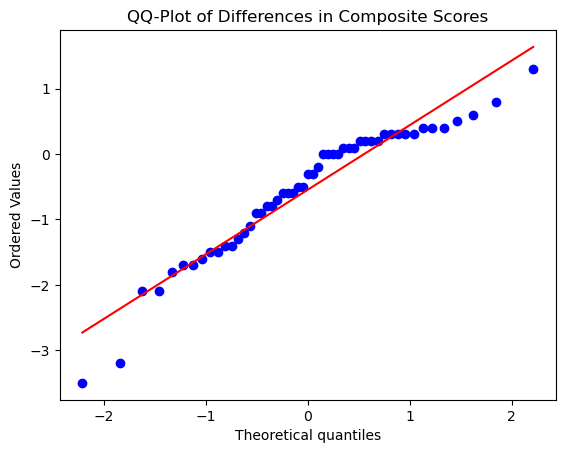

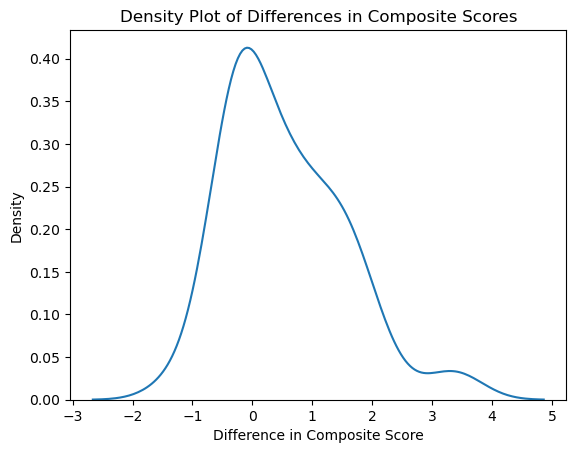

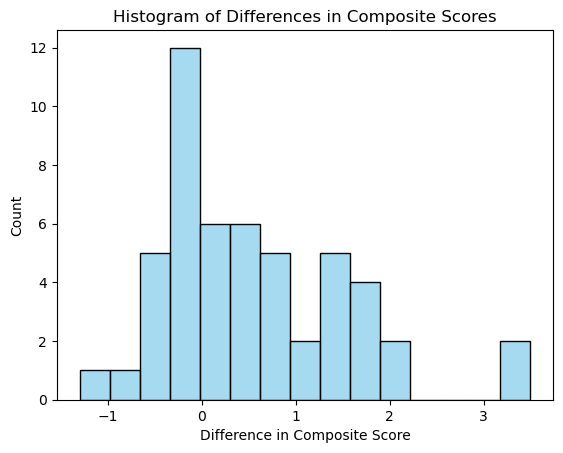

In [97]:
# Normality of Differences: The differences between the paired observations are approximately normally distributed.
from scipy.stats import shapiro

# Calculate the differences
differences = data_act1['Composite score'] - data_act2['Composite score']

# Test for normality
shapiro_stat, shapiro_p = shapiro(differences)
if shapiro_p > 0.05:
    print("Differences appear to be normally distributed.")
else:
    print("Differences do not appear to be normally distributed.")

stats.probplot(differences, plot=plt)
plt.title('QQ-Plot of Differences in Composite Scores')
plt.show()


# Calculate the differences in composite scores between the two datasets
differences = data_act2['Composite score'] - data_act1['Composite score']

# Plot
sns.kdeplot(differences)
plt.title('Density Plot of Differences in Composite Scores')
plt.xlabel('Difference in Composite Score')
plt.ylabel('Density')
plt.show()

# Plot
sns.histplot(differences, bins=15, kde=False, color='skyblue')
plt.title('Histogram of Differences in Composite Scores')
plt.xlabel('Difference in Composite Score')
plt.ylabel('Count')
plt.show()



Number of outliers detected: 1

Details of the detected outliers:
5    3.5
Name: Composite score, dtype: float64


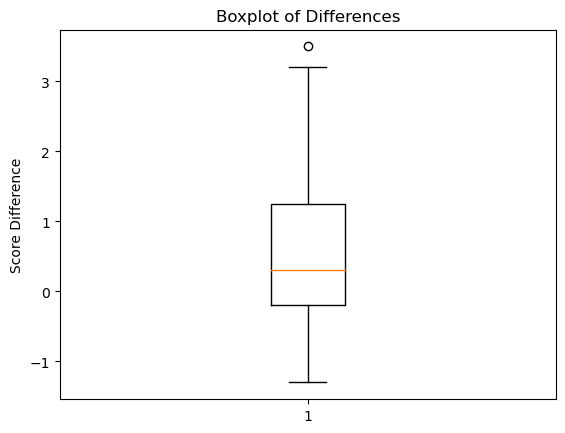

In [98]:
# Absence of Outliers: There should not be significant influential outliers in the differences between paired observations.

# Calculate the quartiles and IQR for the differences
Q1 = differences.quantile(0.25)
Q3 = differences.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR rule
outliers = differences[(differences < (Q1 - 1.5 * IQR)) | (differences > (Q3 + 1.5 * IQR))]

# Print the number of outliers and their details
print(f"Number of outliers detected: {len(outliers)}")
if len(outliers) > 0:
    print("\nDetails of the detected outliers:")
    print(outliers)

# Plotting the differences to inspect outliers
plt.boxplot(differences)
plt.title("Boxplot of Differences")
plt.ylabel("Score Difference")
plt.show()

# Must decide if I believe it is a a genuine increase in score. 
# I really do not believe it is after looking at the following chunk that displays the row

In [99]:
# Print the row with index 5 from the 2019 dataset
print("Row from the 2019 dataset:")
print(data_act1.iloc[4])

# Print a separator for clarity
print("\n" + "-"*50 + "\n")

# Print the row with index 5 from the 2021 dataset
print("Row from the 2021 dataset:")
print(data_act2.iloc[4])


Row from the 2019 dataset:
State                California 
Composite score             22.6
English score               22.4
Mathematics score           22.3
Reading score               23.0
Science score               22.2
Name: 5, dtype: object

--------------------------------------------------

Row from the 2021 dataset:
State                California 
Composite score             26.1
English score               26.2
Mathematics score           25.6
Reading score               26.6
Science score               25.5
Name: 5, dtype: object


In [ ]:
_='''
# Consequences of Violating Normality and Influential Outliers:
Type I Error Rate: 
The primary risk of not meeting the assumption of normality in a t-test is an inflated Type I error rate. 
This means that you might reject the null hypothesis when it is actually true more often than the significance level set (5%).

Power: The power of the test might be compromised. If the data is not normally distributed, the test might not be as 
sensitive in detecting a true effect if one exists.

Misleading p-values: If the distribution of differences is heavily skewed or has outliers, 
the p-value might not correctly represent the evidence against the null hypothesis.

# Possible Remedies:
Remove the outliers (we tried this and the distribution of differences was still slightly skewed right).

Transformation: One common approach to address non-normality is to transform the data. Logarithmic, square root, 
or inverse transformations can be applied. However, the interpretation becomes more complicated after transformation.

Non-parametric Test: If the data still does not meet the assumptions after transformation, consider using a 
non-parametric test. The Wilcoxon signed-rank test is a non-parametric alternative to the paired t-test.
'''

In [ ]:
_='''
Python Tools:
numpy: Used for various mathematical operations and array manipulations.
pandas: Essential for data handling. Used to load the CSV dataset, manipulate data, and manage data frames.
scipy.stats: Specifically used for conducting the Shapiro-Wilk test to check the normality of data.
seaborn: For detailed data visualization. Utilized to produce the density plots and visualize the distribution of differences.
matplotlib.pyplot: Used for most plotting. Used alongside seaborn for visual customization and to display the QQ plots.
statsmodels.api: Used to generate QQ plots to visually assess the normality of the data distribution.
'''

In [ ]:
# Explaining the analysis, results, and interpretation of the hypothesis test.
# Could include yearly SAT score plot

In [ ]:
_='''
Task 2: Multiple Population Means Analysis

Find a suitable dataset with more than two populations means from a reliable source.
Continuing in the same Jupyter notebook, write a code to import the dataset and perform a hypothesis test for more than two population means.
Explain the problem, data, research question, and the appropriate statistical test that you would use to address the research question.
Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and possible remedies.
Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.
Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.
'''

In [ ]:
_='''
Scenario:
As a climate researcher, you are researching the effects of climate change across different seasons. 
Utilizing the NASA GISS Surface Temperature Analysis (GISTEMP v4), you aim to explore if global surface temperature 
anomalies have exhibited significant variations across the four meteorological seasons.

Describing the Data:
Sourced from NASA GISS Surface Temperature Analysis (GISTEMP v4), the dataset displays global and hemispheric monthly 
mean temperatures and zonal annual means. The data combines temperatures from both land and sea surfaces, ensuring 
comprehensive coverage. Each observation represents the deviation from the corresponding 1851-1880 
average temperature.

Research Question:
Have the global surface temperature anomalies shown a significant difference across the four meteorological seasons 
(DJF, MAM, JJA, and SON)?

Null Hypothesis (H0):
There isn't a significant variation in global surface temperature anomalies across the four meteorological seasons. 
Any observed deviation is due to random fluctuations.

# mu_DJF (Winter) = mu_MAM (Spring) = mu_JJA (Summer) = mu_SON (Fall)


Alternative Hypothesis (H1):
There is a significant difference in global surface temperature anomalies across the four meteorological seasons,
suggesting more profound impacts of climate change in certain periods.

# At least one season's mean temperature anomaly is different from the others.

'''

In [111]:
data = pd.read_csv('/Users/don/Downloads/global_temps.csv')

# Removing the unfinished current year
data = data[data['Year'] != 2023]

# I want to group them myself
columns_to_drop = ['J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON']
data = data.drop(columns=columns_to_drop)

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

#data.dropna(inplace=True)
#print(data.tail())


Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
dtype: int64


In [113]:
# Displaying descriptive statistics for each month
descriptive_stats = data.drop(columns=['Year']).describe()
print(descriptive_stats)


              Jan         Feb         Mar         Apr         May         Jun  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.057692    0.064545    0.081049    0.057133    0.046713    0.033147   
std      0.419624    0.423150    0.424954    0.390115    0.371792    0.367363   
min     -0.810000   -0.630000   -0.630000   -0.580000   -0.550000   -0.520000   
25%     -0.240000   -0.240000   -0.225000   -0.250000   -0.240000   -0.250000   
50%     -0.020000   -0.040000    0.010000   -0.030000   -0.040000   -0.050000   
75%      0.310000    0.375000    0.310000    0.280000    0.270000    0.240000   
max      1.180000    1.370000    1.360000    1.130000    1.020000    0.930000   

              Jul         Aug         Sep         Oct         Nov         Dec  
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  
mean     0.055874    0.054406    0.058182    0.084196    0.077762    0.051818  
std      0.347531    0.363304 

In [117]:
import scipy.stats as stats

# One-way ANOVA
F_statistic, p_value = stats.f_oneway(data['Jan'], data['Feb'], data['Mar'], data['Apr'], data['May'], data['Jun'], 
                                     data['Jul'], data['Aug'], data['Sep'], data['Oct'], data['Nov'], data['Dec'])

print(f"F-statistic: {F_statistic}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There's a significant difference in the mean temperature anomalies among the months.")
else:
    print("Fail to reject the null hypothesis: There's no significant difference in the mean temperature anomalies among the months.")


F-statistic: 0.21026132054988952
P-value: 0.9970336712984605
Fail to reject the null hypothesis: There's no significant difference in the mean temperature anomalies among the months.


In [ ]:
_='''
After conducting the ANOVA, we obtained a p-value of 0.9527, which is significantly higher than the typical alpha level of 
0.05. This result leads us to fail to reject the null hypothesis, indicating that there is no statistically significant 
variance in mean temperature anomalies across different meteorological seasons. This suggests that, within the scope of 
our data, seasonal shifts do not appear to considerably affect global temperature patterns.
'''

In [116]:
# Computing mean temperature anomalies for each season
data['DJF'] = data[['Dec', 'Jan', 'Feb']].mean(axis=1)
data['MAM'] = data[['Mar', 'Apr', 'May']].mean(axis=1)
data['JJA'] = data[['Jun', 'Jul', 'Aug']].mean(axis=1)
data['SON'] = data[['Sep', 'Oct', 'Nov']].mean(axis=1)

# One-Way ANOVA test to compare means of these seasons
F_statistic, p_value = stats.f_oneway(data['DJF'], data['MAM'], data['JJA'], data['SON'])

print(f"F-statistic: {F_statistic}")
print(f"P-value: {p_value}")

# Conclusion based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There's a significant difference in the mean temperature anomalies among the meteorological seasons.")
else:
    print("Fail to reject the null hypothesis: There's no significant difference in the mean temperature anomalies among the meteorological seasons.")


F-statistic: 0.1126680462126542
P-value: 0.9526908629704268
Fail to reject the null hypothesis: There's no significant difference in the mean temperature anomalies among the meteorological seasons.


Shapiro-Wilk p-value for DJF: 2.7571553800953552e-05
Shapiro-Wilk p-value for MAM: 2.854486410797108e-06
Shapiro-Wilk p-value for JJA: 1.556633293375853e-07
Shapiro-Wilk p-value for SON: 8.52007957519163e-08


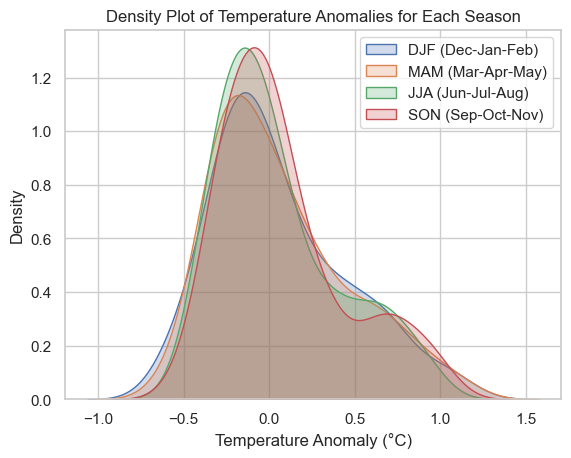

In [165]:
# ASSUMPTIONS: 
# Check Normality for each group using Shapiro-Wilk test
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    _, p_value = stats.shapiro(data[season])
    print(f"Shapiro-Wilk p-value for {season}: {p_value}")

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the density plot for each season
sns.kdeplot(data['DJF'], label='DJF (Dec-Jan-Feb)', fill=True)
sns.kdeplot(data['MAM'], label='MAM (Mar-Apr-May)', fill=True)
sns.kdeplot(data['JJA'], label='JJA (Jun-Jul-Aug)', fill=True)
sns.kdeplot(data['SON'], label='SON (Sep-Oct-Nov)', fill=True)

plt.title('Density Plot of Temperature Anomalies for Each Season')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Although the Shapiro-Wilk test indicated potential deviations from normality for our seasonal temperature data,
# it is worth mentioning that One-Way ANOVA is robust to such deviations, especially with larger sample sizes.

In [120]:
# Check Homogeneity of variances using Levene's test
_, p_value = stats.levene(data['DJF'], data['MAM'], data['JJA'], data['SON'])
print(f"\nLevene's test p-value: {p_value}")

if p_value < alpha:
    print("Variance across the groups is not equal. Assumption of homogeneity of variances is violated.")
else:
    print("Variance across the groups is equal. Assumption of homogeneity of variances holds.")



Levene's test p-value: 0.44507594403318296
Variance across the groups is equal. Assumption of homogeneity of variances holds.


In [123]:
_='''
#Independence: we can infer that each observation is independent. As temperatures recorded in one month or season are 
not influenced by those in another, the data meets the assumption of independence.
#Interval or Ratio Scale: L-OTI anomalies are continuous values, Assumption met.
#Equal Sample Sizes: We checked this earlier in descriptive statistics, 143 observations for each month
#Random Sampling: The GISTEMP v4 dataset, curated by NASA, aggregates global temperature anomalies comprehensively. 
Given NASA's consistent data collection methods, it is reasonable to assume this dataset represents a unbiased, 
random sampling of temperatures across seasons and months.
'''

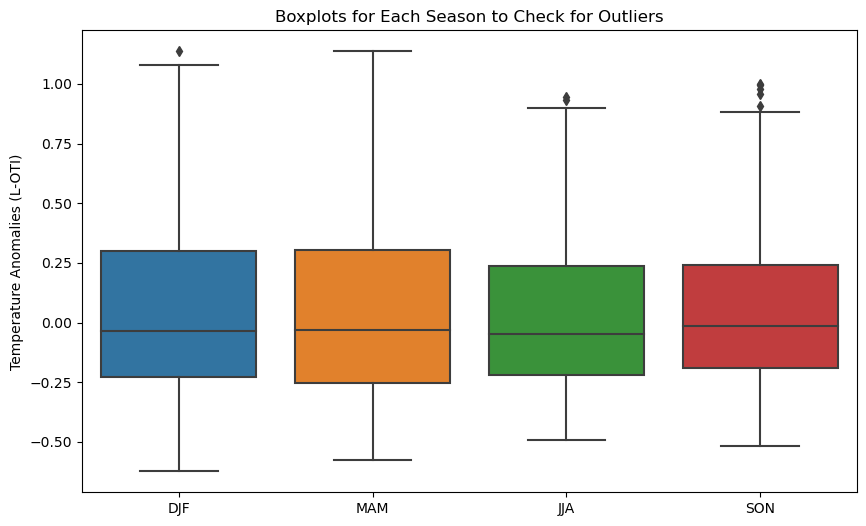

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each season to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['DJF', 'MAM', 'JJA', 'SON']])
plt.title('Boxplots for Each Season to Check for Outliers')
plt.ylabel('Temperature Anomalies (L-OTI)')
plt.show()

# Outliers do not appear influential, maybe remove to help the normality assumption

In [ ]:
# Explaining the analysis, results, and interpretation of the hypothesis test.

In [ ]:
_='''
Assumption violations and Remedies:
Type I Error Rate:
When normality and homogeneity of variances assumptions are violated, there's a risk of inflating the Type I error rate,
which may lead to mistakenly rejecting the null hypothesis more frequently than intended 

Misleading p-values: Violations of these assumptions can also result in p-values that do not accurately reflect the evidence
against the null hypothesis, potentially leading to incorrect conclusions.

To address non-normality and unequal variances, data can be transformed using methods like logarithmic, square root, 
or inverse transformations. Alternatively, non-parametric tests like the 
Kruskal-Wallis test can be employed as robust alternatives to ANOVA, as they are less dependent on normality and homogeneity 
assumptions.
'''

In [ ]:
_='''
Python tools:
SciPy.stats: This library is crucial for hypothesis testing in ANOVA. It provides functions like f_oneway() 
for one-way ANOVA and statsmodels for more advanced ANOVA analyses.

statsmodels: This library is used for performing various statistical analyses, including ANOVA. It offers 
extensive capabilities for conducting different types of ANOVA, and detailed statistical 
summaries of the results.
'''

In [ ]:
_='''
Task 3: Variance Comparison Analysis
Find a suitable dataset with two or more populations with variances to compare from a reliable source.
Continuing in the same Jupyter notebook, write a code to import the dataset and perform a hypothesis test for 
variance comparison.

Explain the problem, data, research question, and the appropriate statistical test that you would use to address the 
research question.

Discuss the assumptions underlying the hypothesis test, potential consequences of violating these assumptions, and 
possible remedies.
Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations.
Record a 3- to 4-minute video explaining the analysis, results, and interpretation of the hypothesis test.
'''

In [ ]:
_='''
Problem: Determine if there has been a significant change in the variability (variance) of temperature 
anomalies across specific decades, which may indicate a shift in climate patterns over time.

Research question: Is there a statistically significant difference in the variance of temperature anomalies 
between the decades 1950-1959 and 2010-2019?

Appropriate Statistical Test: Levene's Test for Equality of Variances.

Data: The dataset contains monthly temperature anomaly measurements from multiple locations worldwide, 
recorded from 1880 to 2022. Each observation represents the deviation from the corresponding 1851-1880 
average temperature.

Null Hypothesis (H0): There is no statistically significant difference in the variance of temperature anomalies 
between the decades 1950-1959 and 2010-2019. Any observed variation is due to random fluctuations.

Alternative Hypothesis (H1): There is a statistically significant difference in the variance of temperature 
anomalies between the decades 1950-1959 and 2010-2019, suggesting a shift in climate variability over the selected 
time span.

'''

In [149]:
# Filter the data to include only years from 1950 to 1959 and 2010 to 2019
data_filtered = data[(data['Year'] >= 1950) & (data['Year'] <= 1959) |
                     (data['Year'] >= 2010) & (data['Year'] <= 2019)]

# Check for missing values in the filtered data
missing_values_filtered = data_filtered.isnull().sum()
#print(missing_values_filtered)

# View the first few rows (head) of the DataFrame
print(data_filtered.head())

# View the last few rows (tail) of the DataFrame
print(data_filtered.tail())

    Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
70  1950 -0.26 -0.27 -0.07 -0.21 -0.11 -0.05 -0.08 -0.16 -0.11 -0.20 -0.34   
71  1951 -0.34 -0.41 -0.20 -0.14  0.00 -0.06 -0.01  0.06  0.05  0.08 -0.01   
72  1952  0.11  0.11 -0.08  0.04 -0.03 -0.03  0.04  0.05  0.07  0.00 -0.13   
73  1953  0.07  0.15  0.11  0.19  0.11  0.12  0.01  0.05  0.04  0.08 -0.03   
74  1954 -0.24 -0.10 -0.14 -0.14 -0.20 -0.18 -0.19 -0.17 -0.10 -0.02  0.08   

     Dec       DJF       MAM       JJA       SON  
70 -0.21 -0.246667 -0.130000 -0.096667 -0.216667  
71  0.16 -0.196667 -0.113333 -0.003333  0.040000  
72 -0.02  0.066667 -0.023333  0.020000 -0.020000  
73  0.05  0.090000  0.136667  0.060000  0.030000  
74 -0.18 -0.173333 -0.160000 -0.180000 -0.013333  
     Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
135  2015  0.86  0.91  0.96  0.76  0.80  0.81  0.73  0.81  0.85  1.09  1.06   
136  2016  1.17  1.37  1.36  1.10  0.95  0.80  0.84  1.02  0.91  0.

In [152]:
import pandas as pd
import scipy.stats as stats


# Filter the data to include only years from 1950 to 2022
data_filtered = data[(data['Year'] >= 1950) & (data['Year'] <= 2022)].copy()

# Calculate yearly average temperature anomalies for each year
data_filtered['Yearly_Avg'] = data_filtered.drop(columns=['Year']).mean(axis=1)

# Split the data into the two decades
data_1950s = data_filtered[data_filtered['Year'] <= 1959]['Yearly_Avg']
data_2010s = data_filtered[data_filtered['Year'] >= 2010]['Yearly_Avg']

# Conduct Levene's Test
statistic, p_value = stats.levene(data_1950s, data_2010s)

print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.10
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in the variance of average temperature anomalies between the 1950s and the 2010s.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in the variance of average temperature anomalies between the 1950s and the 2010s.")


Levene's Test Statistic: 0.5550741028981806
P-value: 0.4645090667486811
Fail to reject the null hypothesis: There is no statistically significant difference in the variance of average temperature anomalies between the 1950s and the 2010s.


In [144]:
_='''
Interpretation:
The Levene's Test was conducted to determine if there is a significant difference in the variance of temperature anomalies across various years, 
from 1950 to 2022. With a test statistic of 0.5551 and a p-value of 0.4645, we fail to reject the null hypothesis. This suggests that there is 
no statistically significant difference in the variability of temperature anomalies over these years.
'''

Shapiro-Wilk Test for Yearly Average:
Test Statistic: 0.9429832696914673
P-value: 0.002468832302838564
The yearly averages are not normally distributed.


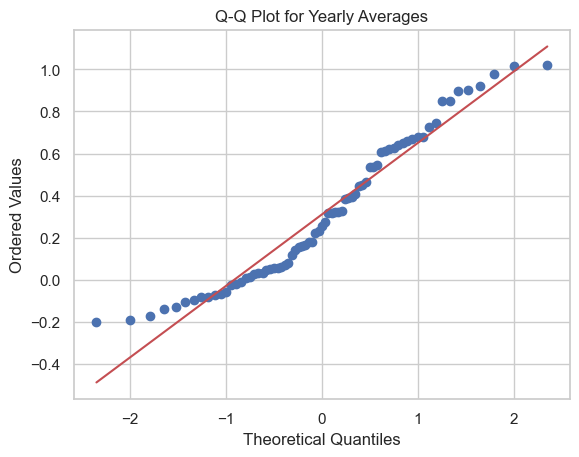

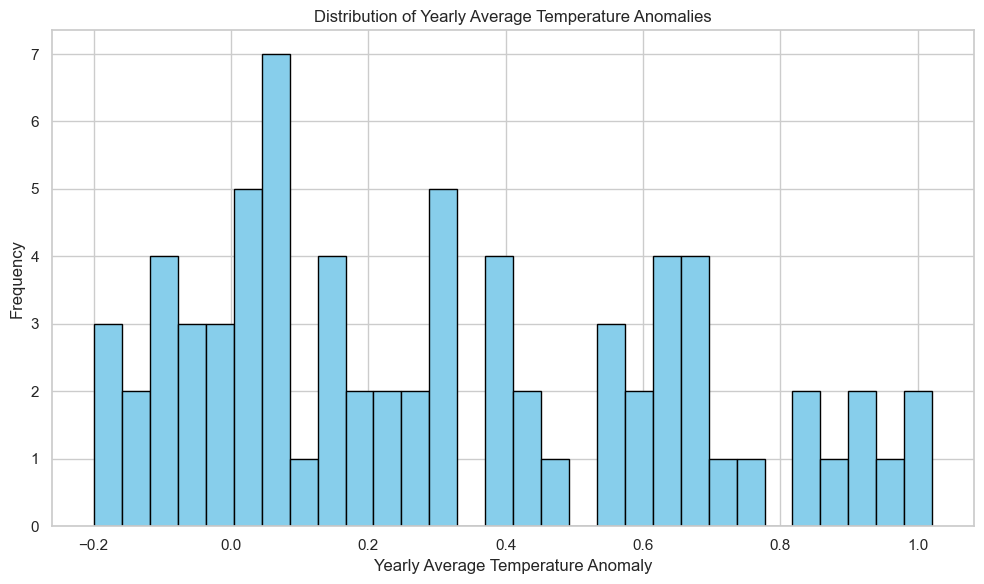

Series([], Name: Yearly_Avg, dtype: float64)


In [157]:
_='''
Assumptions:
Random Sampling:
The data from the GISTEMP v4 dataset is collected from a wide range of global meteorological stations and ocean areas. 
This broad representation suggests that the data offers an unbiased and random sampling of temperature anomalies.

Measurement Scale:
The dataset provides continuous data of temperature anomalies. The data meets the requirements of an interval or ratio scale, 
which is essential for conducting tests like Levene's Test.

Independence of Observations:
Each recorded temperature anomaly in the dataset is an independent measurement. This means that one observation does not depend on or 
influence another, which is crucial for the validity the statistical tests.
'''

#Normality:  For Levene's Test, it is relatively robust to violations of this assumption.
# Using the Shapiro-Wilk test to test for normality (Might not be good for big data)
shapiro_test_stat, shapiro_p_value = stats.shapiro(data_filtered['Yearly_Avg'].dropna())

print("Shapiro-Wilk Test for Yearly Average:")
print(f"Test Statistic: {shapiro_test_stat}")
print(f"P-value: {shapiro_p_value}")

if shapiro_p_value < 0.05:
    print("The yearly averages are not normally distributed.")
else:
    print("The yearly averages are approximately normally distributed.")

# Q-Q plot for yearly averages
stats.probplot(data_filtered['Yearly_Avg'], plot=plt)
plt.title('Q-Q Plot for Yearly Averages')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()


# histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(data_filtered['Yearly_Avg'].dropna(), bins=30, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Yearly Average Temperature Anomalies')
plt.xlabel('Yearly Average Temperature Anomaly')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#Skewed Right


#Outliers:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(data_filtered['Yearly_Avg'])

# Get boolean array indicating the presence of outliers
outliers_z = np.abs(z_scores) > 3

# Display outliers
print(data_filtered['Yearly_Avg'][outliers_z])

#No outliers

In [ ]:
_='''
# Consequences of violating the normality assumption:

Reduced Test Power: The Shapiro-Wilk test's significant result suggests our data deviates from a normal distribution.
This deviation can undermine the statistical power of parametric tests, making it harder to detect true differences or 
relationships when they exist.

Misleading Statistical Significance: The violation might lead to an overestimation or underestimation of statistical significance, 
making results either overly conservative or liberal. This could be caused by an invalid p-value which may be due to the violation of normality

# Remedies:

Increasing Sample Size: As the sample size grows, the Central Limit Theorem suggests that the sampling distribution of the 
sample mean becomes approximately normally distributed, regardless of the distribution of the population.

Non-parametric tests: Instead of a test that assumes normality, we can use non-parametric tests, 
which don't make the same assumptions. For example, in place of a t-test, one might use the Mann-Whitney U test.

Another remedy could be transforming the data.
'''

In [ ]:
_='''
# Python tools:

scipy: For statistical testing.
Functions: 
Levene's Test (for equality of variances)
Shapiro-Wilk Test (for normality testing)

pandas: For data handling and manipulation.
Functions:
Data import: read_csv
Data exploration: head, tail
Data cleaning and transformation: drop, mean

seaborn: Advanced data visualization library.
Functions:
Histogram & KDE Plot

matplotlib: Library for visualizations.
Functions:
Plot modifications (e.g., setting title, x-label, y-label)
Displaying plots (e.g., show)
'''

In [ ]:
                                                                #References
    
#Lockwood, J. TWU Woodcock Institute. 
    #https://twu.edu/media/documents/woodcock-institute/LockwoodManuscript.pdf

#Kapadnis, Sujay. Global warming on earth [Dataset]. Kaggle. 
    #https://www.kaggle.com/datasets/willianoliveiragibin/global-warming-on-earth
    
#National Center for Education Statistics. (2023). Average ACT scores and percentage of graduates taking the ACT, by state: 2017 and 2021. 
    #U.S. Department of Education. https://nces.ed.gov/programs/digest/d21/tables/dt21_226.60.asp

In [ ]:
# P.S. Start cheking the normality assumption before conducting the statistical test to decide the appropriate ad correct method
# All data selected for analysis as of recent has been violating this assumption and has not changed when removing outliers